<h3> LAB 6 - Filtragem digital 1</h3>
<h5> Processamento Digital de Sinais II - TE912 </h5>
<h5> Leonardo Barbosa da Silva GRR20162855 </h5> 

In [1]:
# Inicializa os pacotes que serão utilizados
from pylab import *
from scipy.signal import *

1) Considere o sinal x a soma de 3 senoides: n=0:128; x = sin(6\*pi\*n/32) + sin(12\*pi\*n/32) + sin(18\*pi\*n/32)

In [2]:
# Vetor de tamanho 129, para ter valores de 0 a 128
n = arange(129)
x = sin(6*pi*n/32) + sin(12*pi*n/32) + sin(18*pi*n/32)

# Usa-se fftshift e fftfreq para posicionar 0 rad no centro dos plots
X = fftshift(abs(fft(x)))
w = fftshift(fftfreq(len(n))*2*pi)

2) Projete um filtro FIR de ordem 10 para deixar passar somente a segunda senoide, por janelamento (função firwin() no Python ou fir1() no Matlab).

In [3]:
# Frequências de corte para delimitar a banda de passagem
# +- 20% da frequência desejada
Wn = concatenate((12/32* 0.8, 12/32*1.2), axis=None)

# Criação do filtro FIR de 11 taps (N taps = ordem + 1)
# Por default o filtro aplicado é do tipo Hamming
FIR_b = firwin(11, Wn, pass_zero='bandpass')
w_FIR, H_FIR = freqz(FIR_b,1,w)

3) Projete um filtro IIR de ordem 10, semelhante ao anterior, usando a função butter()

In [4]:
# Cireação do filtro butterworth
butter_b, butter_a = butter(10, Wn, btype='bandpass')
w_butter, H_butter = freqz(butter_b,butter_a,w)

4) Projete um filtro IIR de ordem 6, semelhante ao anterior, usando a função ellip()

In [5]:
# Criação do filtro Elíptico. Os parâmetros rp e rs foram arbitrados até  
# se encontrar uma envolvoltória aceitável
ellip_b, ellip_a = ellip(10, 0.3, 40, Wn, btype='bandpass')
w_ellip, H_ellip = freqz(ellip_b,ellip_a,w)

5) Plote o espectro do sinal x juntamente com as respostas em frequência dos três filtros.

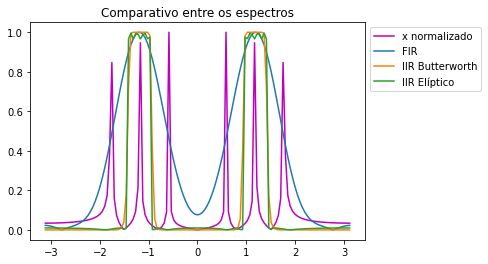

In [6]:
# Plots dos espectros
# Optou-se por normalizar o x para aproveitar melhor a escala
# do gráfico
plot(w,X/max(X),'m')
plot(w_FIR,abs(H_FIR))
plot(w_butter, abs(H_butter))
plot(w_ellip, abs(H_ellip))
legend(['x normalizado', 
        'FIR', 
        'IIR Butterworth',
        'IIR Elíptico'],
         loc='upper left', bbox_to_anchor=(1,1))
title("Comparativo entre os espectros")
show()

6) Filtre o sinal com cada filtro, e plote no mesmo eixo os três sinais filtrados.

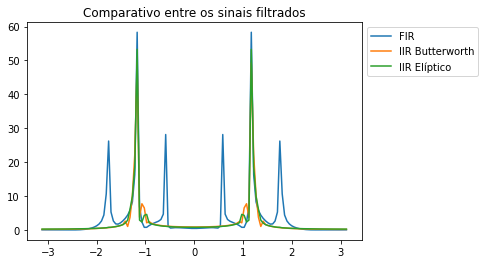

In [7]:
# Filtragem de x
x_FIR = lfilter(FIR_b, 1, x);
x_butter = lfilter(butter_b, butter_a, x);
x_ellip = lfilter(ellip_b, ellip_a, x);

# Respostas em frequência dos sinais filtrados
X_FIR = fftshift(abs(fft(x_FIR)))
X_butter = fftshift(abs(fft(x_butter)))
X_ellip = fftshift(abs(fft(x_ellip)))

# Plots das respostas em frequência
plot(w_FIR, X_FIR)
plot(w_butter, X_butter)
plot(w_ellip, X_ellip)
legend(['FIR', 
        'IIR Butterworth',
        'IIR Elíptico'],
         loc='upper left', bbox_to_anchor=(1,1))
title("Comparativo entre os sinais filtrados")
show()

<b>7) Qual dos três filtros rejeitou melhor as frequências baixa e alta ?</b>

O filtro que apresentou melhor seletividade da frequência central foi o Elíptico, que reproduziu de forma bem fiel o sinal desejado original. 

O Butterworth apresentou um pouco de ruído no sinal, porém também selecionou de forma bem satisfatória a segunda frequência.

Já o filtro FIR atenuou as frequências baixa e alta, porém não foi capaz de as rejeitar completamente.

<b>8) Plote no mesmo eixo a resposta em frequência do filtro FIR obtida de duas formas diferentes: <br>
a) freqz() <br>
b) T.F. da resposta ao impulso. <br>
(obs.: lembre que os próprios coeficiente do filtro são a resposta ao impulso). </b>

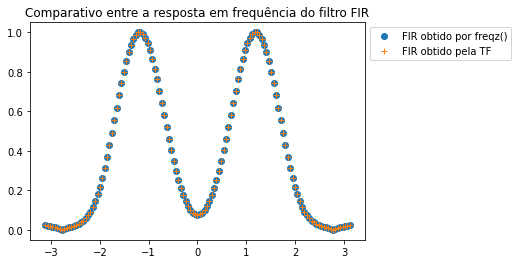

In [8]:
# Determinação da resposta impulso do filtro
# Coeficiente b preenchido com zeros 
b = concatenate((FIR_b,zeros(len(n)-len(FIR_b))), axis=None)
B = fftshift(fft(b))

# Plots do comparativo
# H_FIR foi criado já no início do script
plot(w_FIR, abs(H_FIR),'o')
plot(w_FIR, abs(B),'+')

legend(['FIR obtido por freqz()', 
        'FIR obtido pela TF'],
         loc='upper left', bbox_to_anchor=(1,1))
title("Comparativo entre a resposta em frequência do filtro FIR")
show()